# Basics of FastPair

1. Setup
2. Properties
3. Appending Values & Vizualization

In [1]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

Last updated: 2024-06-15T14:59:33.420817-04:00

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [2]:
import matplotlib.pyplot as plt

import fastpair

%watermark -w
%watermark -iv

Watermark: 2.4.3

matplotlib: 3.9.0
fastpair  : 0.1.1.dev8+g5f8e7a5.d20240611



---------------------

## 1. Properties

The simplest way to use a `FastPair` data-structure is to initialize one and then update it with data points (via the `+=` operator), which we will explore later. In this first example, we declare 3 2D points and add them to a `FastPair` object.

In [3]:
points = [(1, 1), (2, 2), (4, 4)]
points

[(1, 1), (2, 2), (4, 4)]

Create empty data-structure with default values:

* `min_points=10`
* `default=scipy.spatial.distance.euclidean`

In [4]:
fp = fastpair.FastPair()
fp

Add points all at once and build conga line to start:

In [5]:
fp.build(points)

### `FastPair` has several useful properties and methods

1. Checking the size of the data-structure (i.e., how many points are currently stored).
2. Testing for containment of a given point
3. Various methods for computing the closest pair
4. Finding the neighbor of a given point
5. Computing multiple distances at once 
6. ... and *even merging points (clusters)*.

<div class="alert alert-block alert-warning">
<b>Important:</b> merging functionality is not currently implemented
</div>

#### Checking size

How many point are currently stored?

In [6]:
len(fp)

3

#### Testing containment

Is the first element of `points` in the `fp` instance?

In [7]:
points[0] in fp

True

Is a point as `(25, 25)` in the `fp` instance?

In [8]:
(25, 25) in fp

False

#### Computing the closest pair

Simply call the `fp` instance.

In [9]:
fp()

(1.4142135623730951, ((1, 1), (2, 2)))

Call the `closest_pair` method of the `fp` instance.

In [10]:
fp.closest_pair()

(1.4142135623730951, ((1, 1), (2, 2)))

Call the `closest_pair_brute_force` method.

In [11]:
fp.closest_pair_brute_force()

(1.4142135623730951, ((1, 1), (2, 2)))

#### Finding the neighbor of a given point

What's the neighbor of the 2nd element of `points`?

In [12]:
print(f"{points=}\n{points[1]=}")

points=[(1, 1), (2, 2), (4, 4)]
points[1]=(2, 2)


In [13]:
neigh = fp._find_neighbor(points[1])
neigh["neigh"]

(1, 1)

How far away is it?

In [14]:
neigh["dist"]

1.4142135623730951

How about about a point outside `points` set?

In [15]:
neigh = fp._find_neighbor((25, 25))
neigh["neigh"]

(4, 4)

In [16]:
neigh["dist"]

29.698484809834994

#### Computing multiple distances at once

How about the distance from a new point at `(-1, -1)` to all points in `fp`?

In [17]:
tuple(fp.sdist((-1, -1)))

((2.8284271247461903, (1, 1)),
 (4.242640687119285, (2, 2)),
 (7.0710678118654755, (4, 4)))

--------------

## 3. Appending Values & Vizualization

A key strength of `fastpair` is the ability to incorporate additional points dynamically (or remove them) while the data-structure responds and updates accordingly (see this paper referenced below for details).

* ***David Eppstein*** (2001). *Fast hierarchical clustering and other applications of dynamic closest pairs*. ACM J. Exp. Algorithmics 5 (2000), 1–es. doi: [10.1145/351827.351829](https://doi.org/10.1145/351827.351829)

### Explore the current state of the `fp` instance

#### Query the closest pair

In [18]:
dist, (a, b) = fp.closest_pair()
dist, (a, b)

(1.4142135623730951, ((1, 1), (2, 2)))

Here we can verify the closest pair is `((1, 1), (2, 2))` at `≈1.414` units distance.

#### Visualize
* 3 initial points in `"cadetblue"`
* Current closest pair in `"red"`

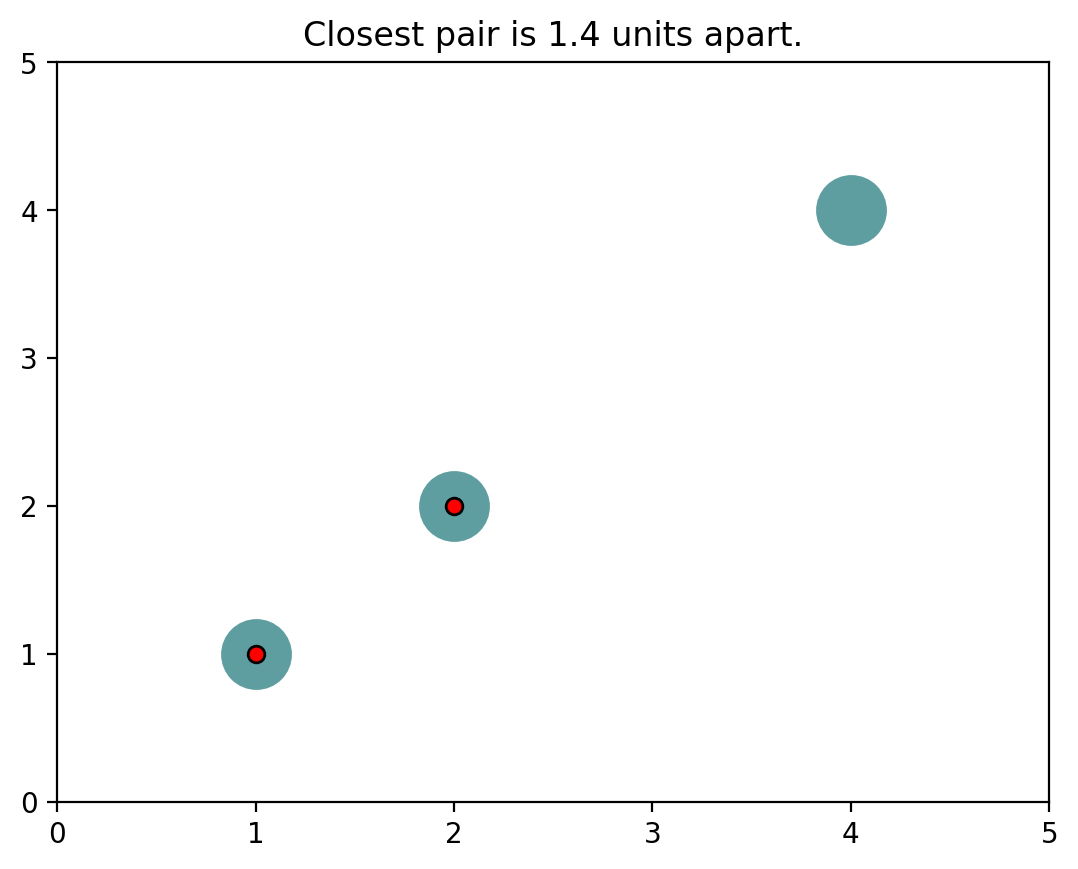

In [19]:
plt.scatter(*zip(*fp.points, strict=True), s=600, color="cadetblue", zorder=1)
plt.scatter(*zip(a, b, strict=True), color="red", ec="k", zorder=2)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title(f"Closest pair is {dist:.2} units apart.");

### Append several points

Add 3 more 2D points with the `+=` operator and query again.

In [20]:
fp += (1, 2)
fp += (3, 3)
fp += (2, 4)

#### Query the closest pair

In [21]:
dist, (a, b) = fp.closest_pair()
dist, (a, b)

(1.0, ((1, 2), (1, 1)))

The closest pair has been updated to `(1, 2), (1, 1))` at exactly `1` units distance.

#### Visualize

* 3 initial points in `"cadetblue"`
* 3 additional points in `"goldenrod"`
* Current closest pair in `"red"`

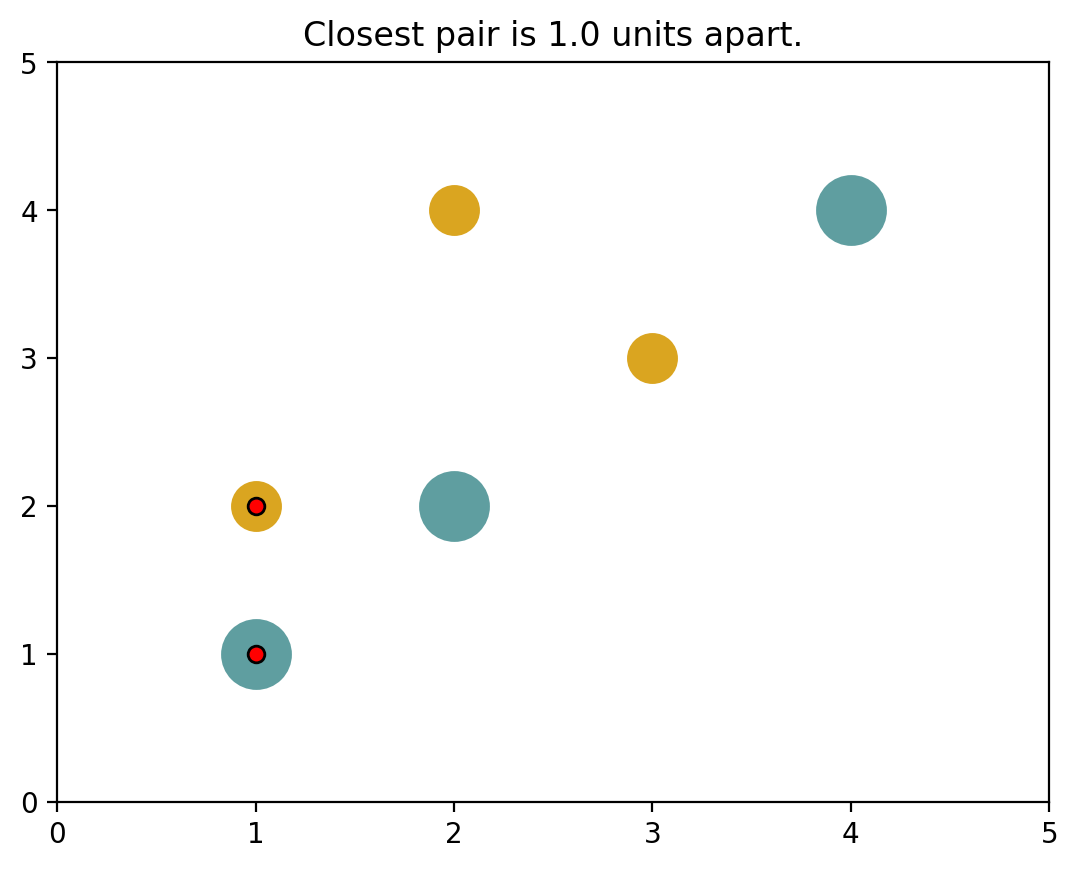

In [22]:
plt.scatter(*zip(*fp.points[:3], strict=True), s=600, color="cadetblue", zorder=1)
plt.scatter(*zip(*fp.points[3:], strict=True), s=300, color="goldenrod", zorder=2)
plt.scatter(*zip(a, b, strict=True), color="red", ec="k", zorder=3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title(f"Closest pair is {dist:.2} units apart.");

### Append several more points

Add 3 more 2D points with the `+=` operator and query again.

In [23]:
fp += (4, 1)
fp += (1, 4)
fp += (4, 2)

#### Query the closest pair

In [24]:
dist, (a, b) = fp.closest_pair()
dist, (a, b)

(1.0, ((1, 2), (1, 1)))

The closest pair remains `(1, 2), (1, 1))` since no closer points were added.

#### Visualize

* 3 initial points in `"cadetblue"`
* First set of 3 additional points in `"goldenrod"`
* Second set of 3 additional points in `"darkolivegreen"`
* Current closest pair in `"red"`

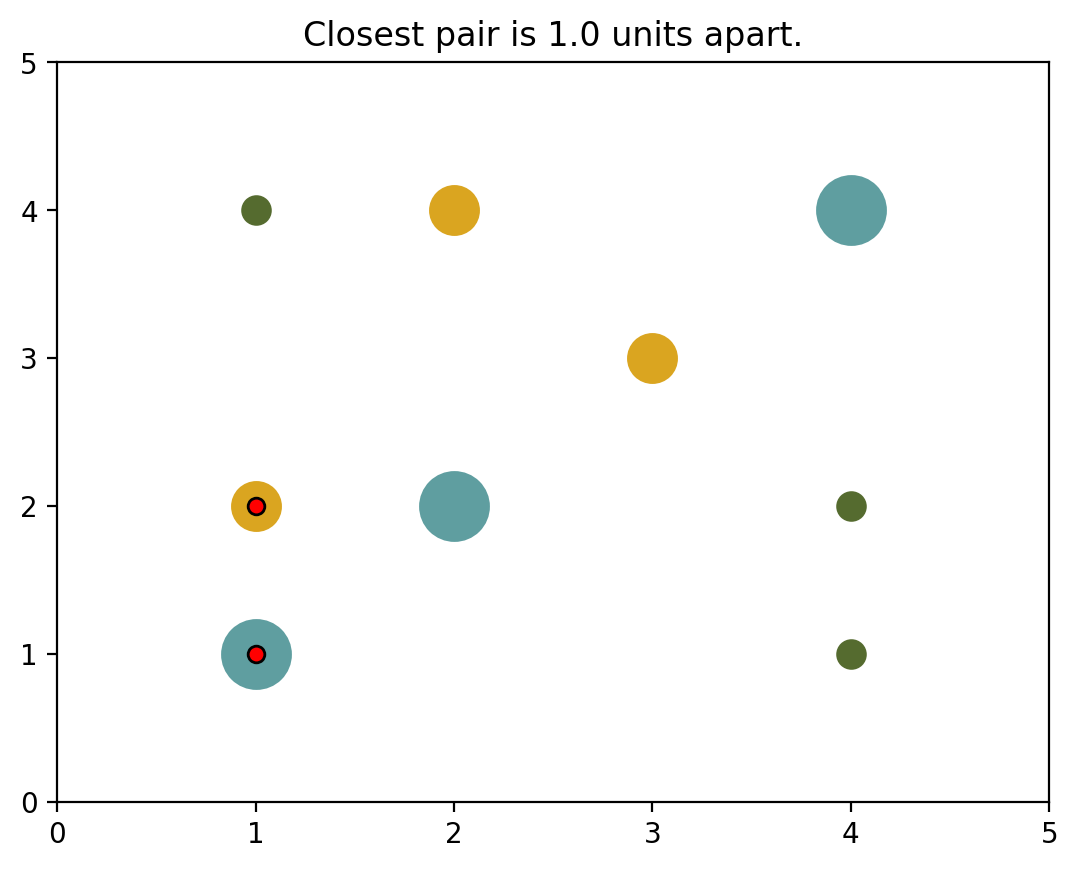

In [25]:
plt.scatter(*zip(*fp.points[:3], strict=True), s=600, color="cadetblue", zorder=1)
plt.scatter(*zip(*fp.points[3:-3], strict=True), s=300, color="goldenrod", zorder=2)
plt.scatter(*zip(*fp.points[-3:], strict=True), s=100, color="darkolivegreen", zorder=3)
plt.scatter(*zip(a, b, strict=True), color="red", ec="k", zorder=3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title(f"Closest pair is {dist:.2} units apart.");

------------------------